In [2]:
import os
from os import listdir
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/lancy/Desktop/Topics-Extraction-Hotel-Reviews/Nlp project/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv', header=0)
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [3]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

In [4]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
polarity=[]
for i in df['reviews.text']:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
    except:
        polarity.append(0)

In [5]:
df['polarity']=polarity

In [6]:
df.loc[:,"polarity"].max()

1.0

In [7]:
df.loc[:,"reviews.rating"].min()

1

In [8]:
bins = [-1, -0.6, -0.2, 0.2, 0.4, 1]
names = ['1','2','3','4','5']
df['new_polarity'] = pd.cut(df['polarity'], bins, labels=names)

In [10]:
df1 = df[['name','reviews.text','polarity','new_polarity','reviews.rating']]
df1.head()

,name,reviews.text,polarity,new_polarity,reviews.rating
0,Best Western Plus South Coast Inn,"This hotel was nice and quiet. Did not know, t...",0.187500,3,3
1,Best Western Carmel's Town House Lodge,We stayed in the king suite with the separatio...,0.399524,4,4
2,Best Western Carmel's Town House Lodge,"Parking was horrible, somebody ran into my ren...",-0.350000,2,3
3,Best Western Carmel's Town House Lodge,Not cheap but excellent location. Price is som...,0.495238,5,5
4,Best Western Carmel's Town House Lodge,If you get the room that they advertised on th...,0.214286,4,2


In [20]:
print(df1[df1['new_polarity'].isnull()])
df1['new_polarity'] = pd.to_numeric(df1['new_polarity'], errors='coerce')
df1 = df1.dropna(subset=['new_polarity'])

                                                 name  \
2304  Days Inn By Wyndham Orlando/International Drive   

                                           reviews.text  polarity  \
2304  The staff were horrible!!!!!!! We told them th...      -1.0   

     new_polarity  reviews.rating  
2304          NaN               1  


In [21]:
df1['new_polarity'] = df1['new_polarity'].astype('int64')

In [30]:
df1.count()

name              9999
reviews.text      9999
polarity          9999
new_polarity      9999
reviews.rating    9999
dtype: int64

In [32]:
accuracy = (len(df1[df1['new_polarity'] == df1['reviews.rating']])/9999) *100
accuracy

40.84408440844084

In [33]:
#positive comments
pos_com = df1[df1.polarity>0]
pos_com.head()

,name,reviews.text,polarity,new_polarity,reviews.rating
0,Best Western Plus South Coast Inn,"This hotel was nice and quiet. Did not know, t...",0.187500,3,3
1,Best Western Carmel's Town House Lodge,We stayed in the king suite with the separatio...,0.399524,4,4
3,Best Western Carmel's Town House Lodge,Not cheap but excellent location. Price is som...,0.495238,5,5
4,Best Western Carmel's Town House Lodge,If you get the room that they advertised on th...,0.214286,4,2
5,21c Museum Hotel Lexington,"This is such a fun, lovely hotel. The attentio...",0.198077,3,4


In [35]:
pos_com.count()

name              9469
reviews.text      9469
polarity          9469
new_polarity      9469
reviews.rating    9469
dtype: int64

In [36]:
accuracy = (len(pos_com[pos_com['new_polarity'] == pos_com['reviews.rating']])/9469) * 100
accuracy

42.04245432463829

In [45]:
difference = (len(pos_com[pos_com['new_polarity'] != pos_com['reviews.rating']])/9469) * 100
difference

57.95754567536171

In [37]:
#negative comments
neg_com = df1[df1.polarity<0]
neg_com.head()

,name,reviews.text,polarity,new_polarity,reviews.rating
2,Best Western Carmel's Town House Lodge,"Parking was horrible, somebody ran into my ren...",-0.350000,2,3
7,Springs Motel LLC,"I reserved a room a week in advance, knowing a...",-0.400000,2,1
9,American Inn,"Hello, I have traveled a lot and abroad and by...",-0.342857,2,1
15,The Whitney Hotel,"This Hotel, formerly a prestigious bank, may b...",-0.041127,3,2
94,"Marriott Vacation Club Pulse, San Diego",accused of smoking in my room. only young blac...,-0.150852,3,1


In [39]:
neg_com.count()

name              493
reviews.text      493
polarity          493
new_polarity      493
reviews.rating    493
dtype: int64

In [40]:
accuracy = (len(neg_com[neg_com['new_polarity'] == neg_com['reviews.rating']])/493) * 100
accuracy

19.066937119675455

In [46]:
difference = (len(neg_com[neg_com['new_polarity'] != neg_com['reviews.rating']])/493) * 100
difference

80.93306288032454

In [55]:
#neutral comments
#df[['name','reviews.text','polarity']][df.polarity==0].head(20)

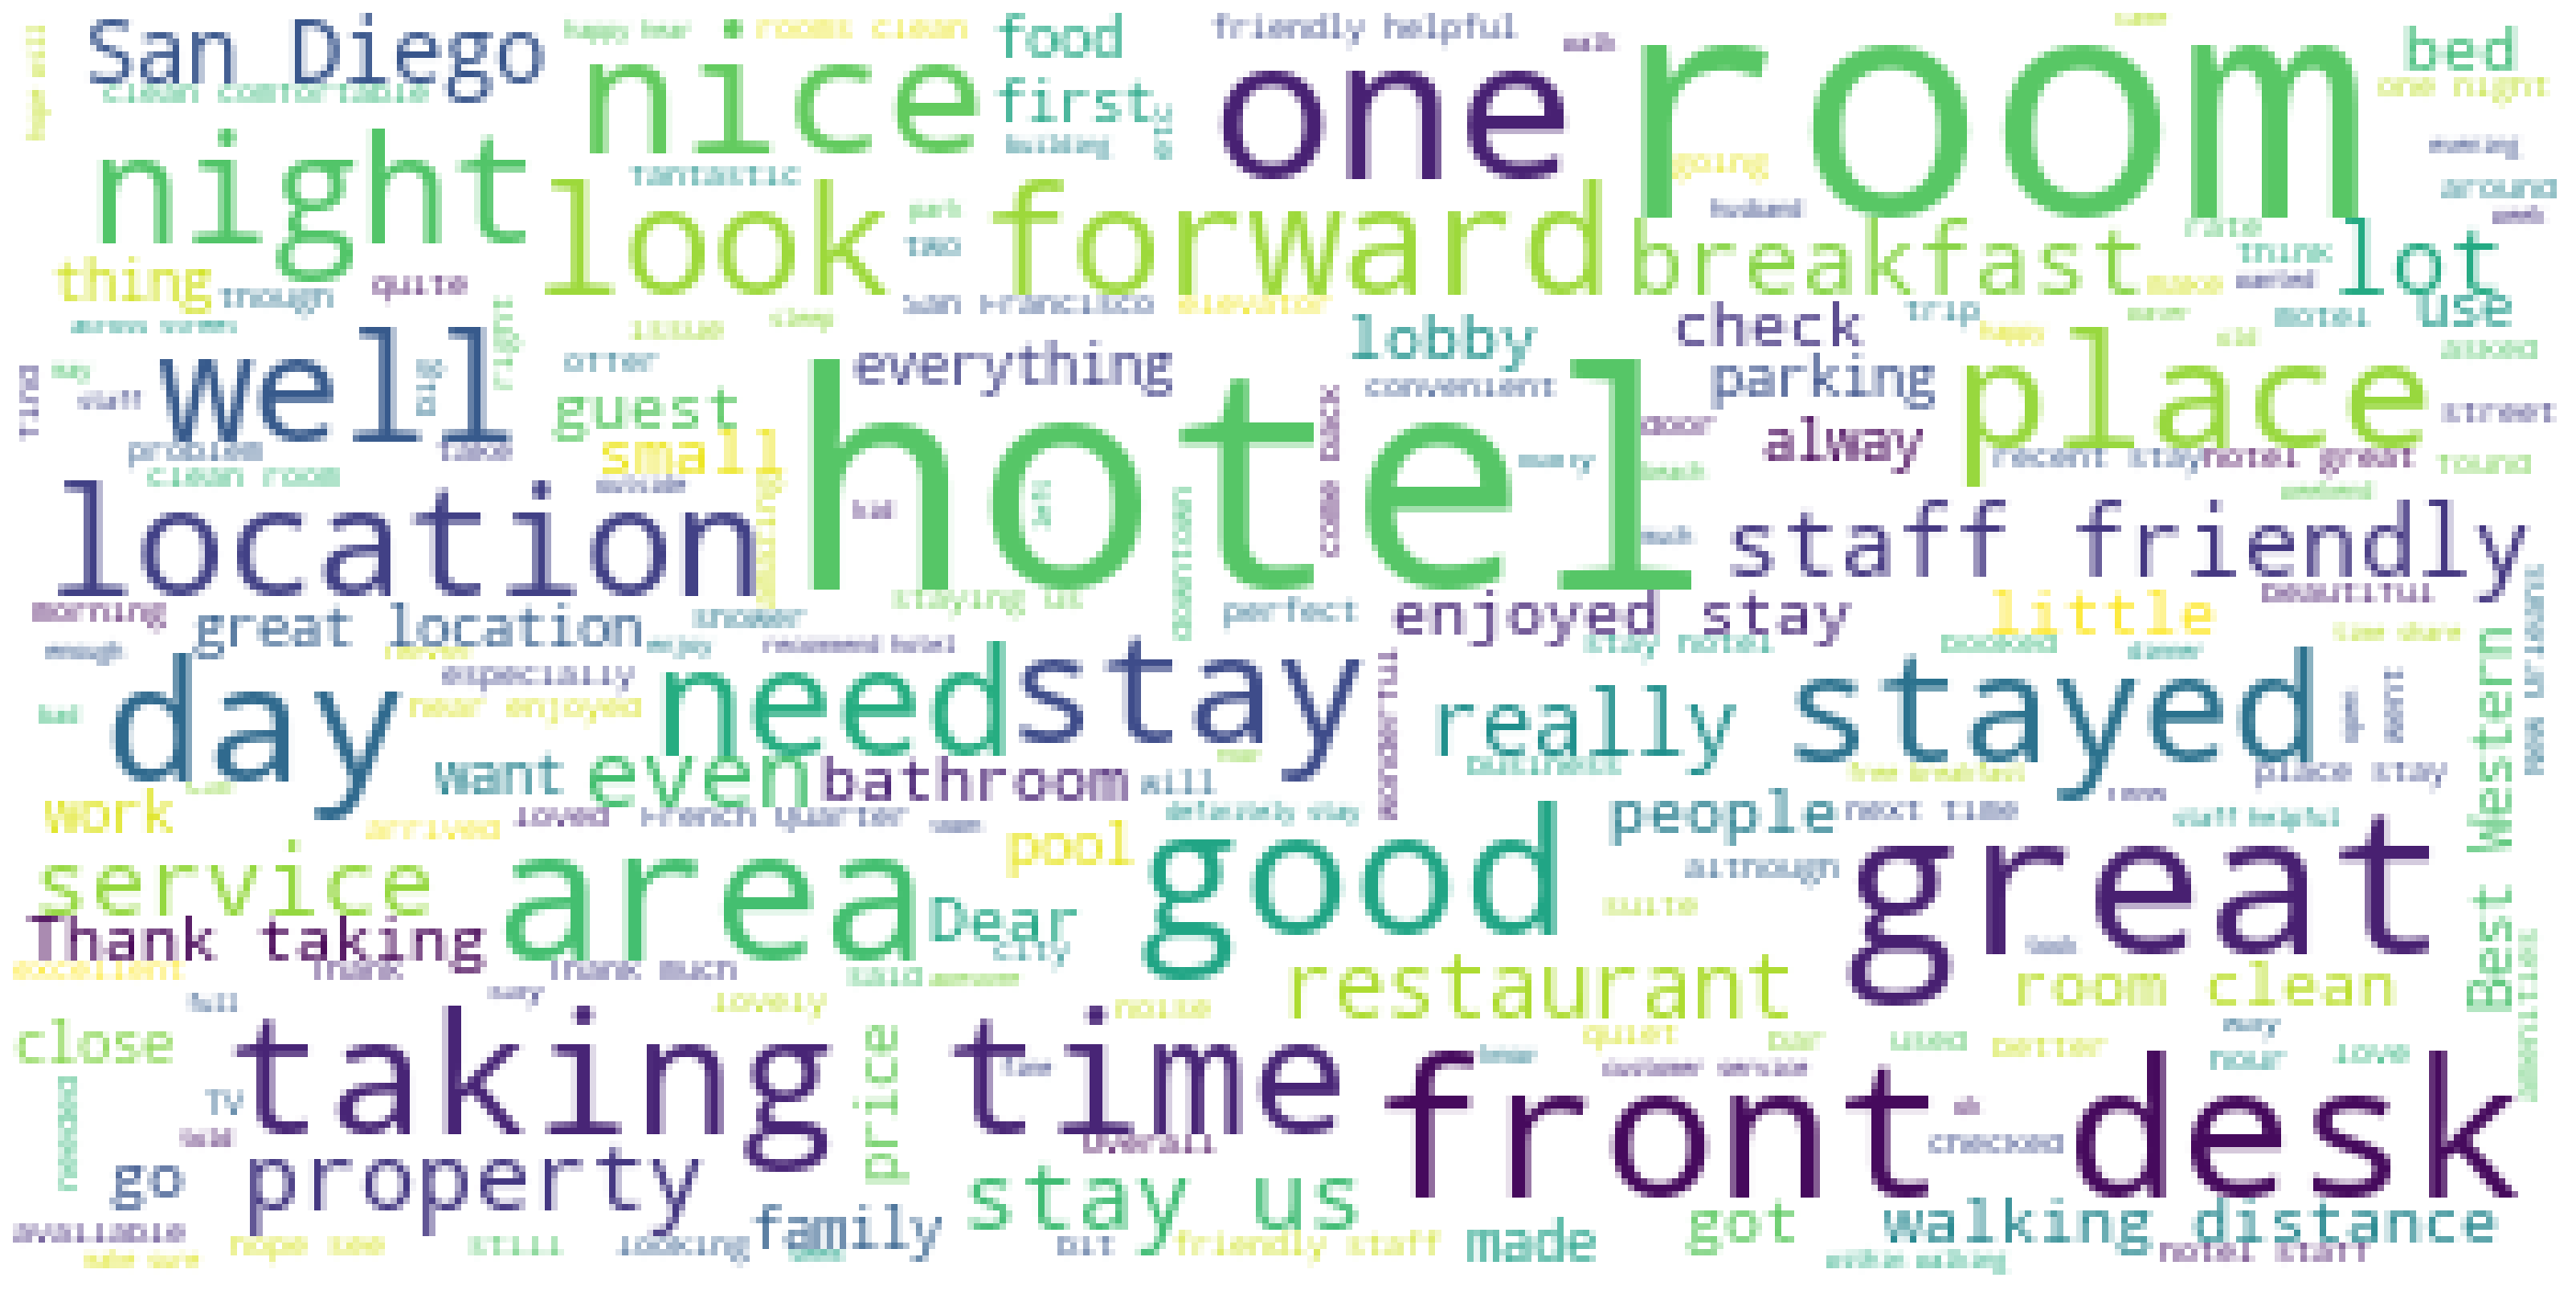

In [41]:
#highly positive reviews
wc(df['reviews.text'][df.polarity>0],'white','Common Words' )

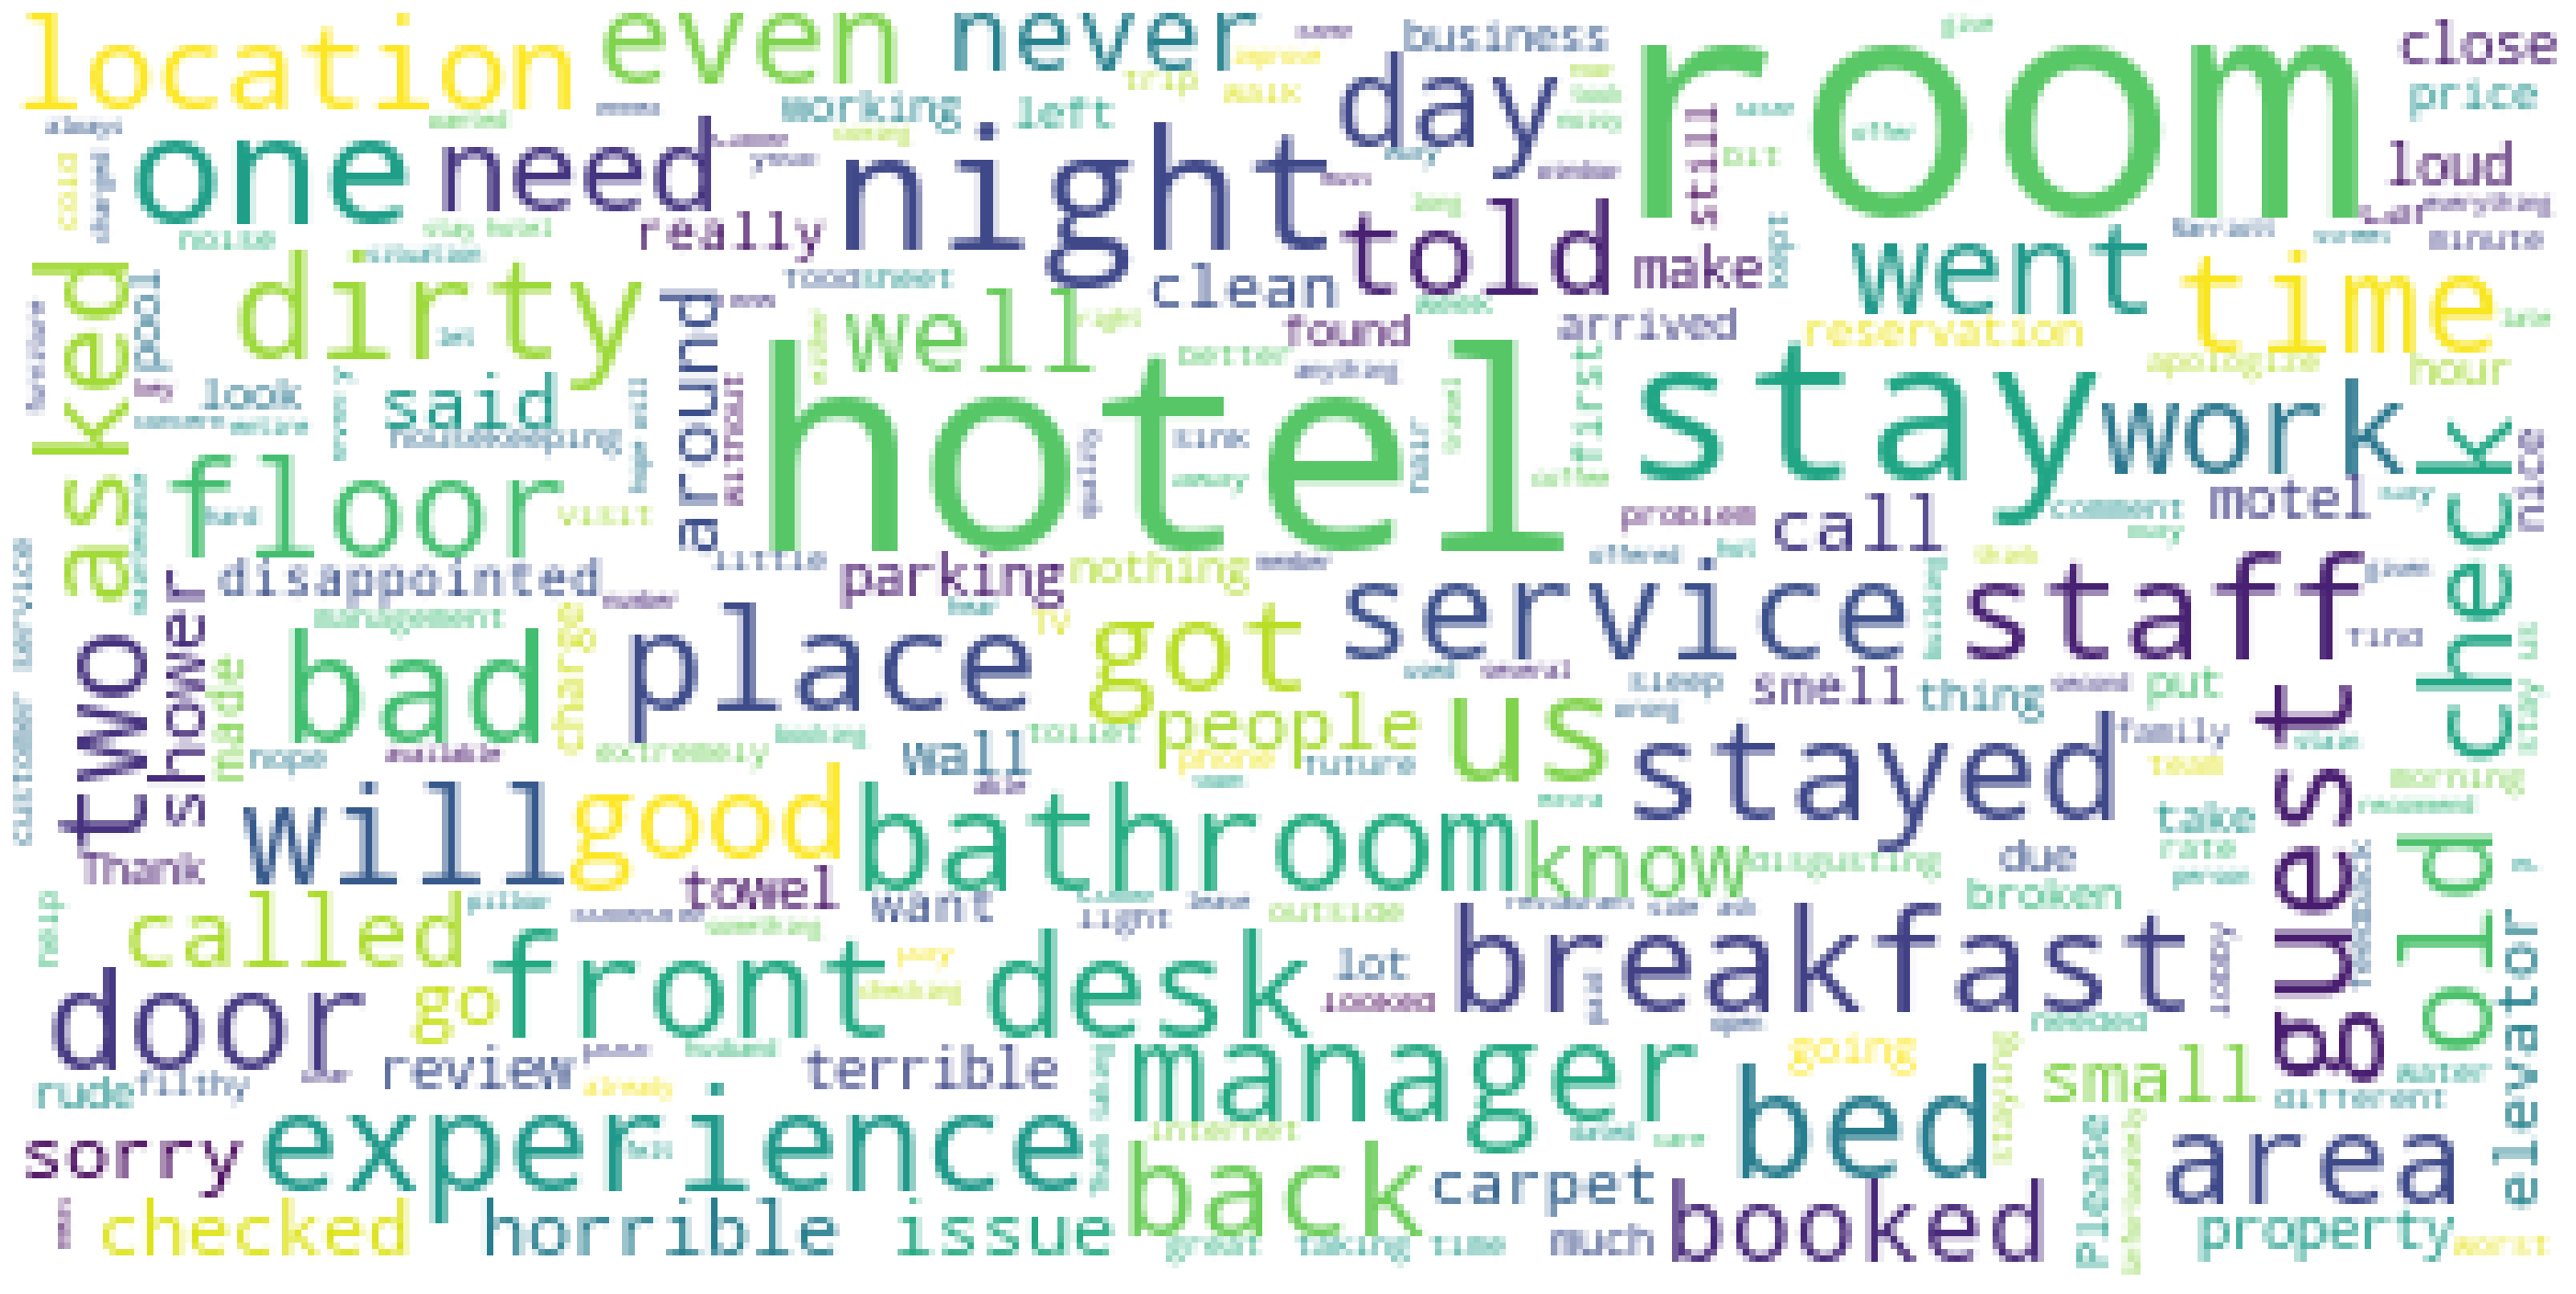

In [42]:
#highly negative reviews
wc(df['reviews.text'][df.polarity<0],'white','Common Words' )

In [43]:
#df['polarity'][df.polarity==0]= 0
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

 1.0    9469
-1.0     493
 0.0      37
Name: polarity, dtype: int64

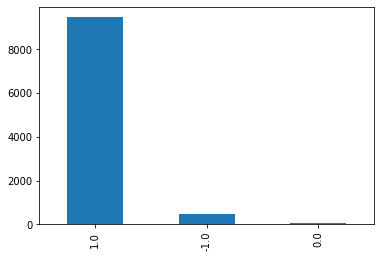

In [44]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()